# Assignment 6

**Submission deadline: Friday 16.6.17** Note that the deadline is after Corpus Christi - a day off. All groups (especially the Thursday one) can submit the solutions up to this date using email and show them later, however please don't abuse this mechanism.

**Points: 6 + 8 bonus points**


## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions.

For programming exercises add your solutions to the notebook. 

Please do not hesitate to use GitHub’s pull requests to send us corrections!

In [ ]:
%pylab inline

In [28]:
import numpy as np
import pandas

import cvxopt
from sklearn import svm

## Installing dependencies
  
When using lab computers, you are all set :)

When using your home computer you need to install CVXOPT
(Python Software for Convex Optimization):
1. for Linux Anaconda python you can install cvxopt running `conda install cvxopt`.
2. On Windows download a package from http://www.lfd.uci.edu/~gohlke/pythonlibs/\#cvxopt. Under
  WinPython, you can use the WinPython control panel to intall the
  package. On Anconda simply unzip the downloaded file (it's a zip
  file in disguise) and place the contents somewhere under your
  PYTHONPATH environment variable.

# Regularization theory

We are solving the problem of finding a general relation describing
all of certain data (e.g. recognizing all handwritten digits) based on
a finite dataset available to us. Therefore our goal is not to achieve
a 100\% perfect fit to the training data. In fact achieving 100\%
accuracy on the training data is easy - a 1-nearest neighbors
classifier scores 100\% on the training set. Instead, we are
concerned about generalization, that is being able to find relations
that are not only valid on the data set, but also on other, unknown to
us data.

During lectures we have learned about two problems related to
finding a general relation based on a training data set:

1. **bias** - which occurs when the model we are training cannot
  express the relation in the data because it is too weak, or in other
  words the hypothesis space we consider is too narrow. 
  Intuitively, bias is similar to systematic errors in
  physical measurements -- when the model has a high bias, it simply
  cannot express the correct relation.

2. **variance** - which is
  variability of the trained model due to variation in the data set,
  randomness in the
  training algorithm etc. 
  When variance is high, repeated training of the model will result in
  very different solutions with varying generalization
  errors. Intuitively, variance is similar to the random errors in
  physical measurements - repeated model training (possibly on new
  training data) can help.

During the lectures we have seen that learning from data is
impossible without bias, and 
that the art of machine learning is striking a balance between the
error due to bias and the error due to variance. We must carefully
constrain the model capacity, on the one hand ensuring that it is able
to represent a sufficiently close approximation to the real relation
in the data, while on the other hand maintaining low variability and
randomness of the effects of training. We will call the action of
constraining the capacity *model regularization*.

A very generic form of regularization, called *weight decay*,
consists of penalizing the model for the magnitude of its
weights. Intuitively weight decay says that we should prefer models
(linear regression or neural networks) whose weights are small. Do you
remember how increasing *K* in K-nearest neighbors smoothed out the
output of a classifier because it was averaging several data points?
Intuitively, weight decay also smooths the classifier's output. You
can recall from the gradient backpropagation equations that the gradient with respect to the
inputs is proportional to the weights connected to the
inputs. Therefore, the smaller the weights the smaller the gradient,
which in turn limits how fast the classifier's output can change for a
change of its inputs.

## Ridge regression

Minimization of square of a model's weights is a very popular
regularization, called by many names: weight decay, ridge regression,
Tikhonov regularization, or L2 regularization. 

Unregularized linear regression predicts the value
$y\in\mathbb{R}$ as a function of $x\in\mathbb{R}^n$ expressed by the
formula $y=\Theta^T x$. The parameters $\Theta \in \mathbb{R}^{n+1}$ (we assume
that $x$ is extended with $x_0=1$) are chosen to minimize:

\begin{equation}
     \Theta^* = \arg \min_\Theta J(\Theta) = \arg \min_\Theta \frac{1}{m}\sum_{j=1}^m (y^{(j)} - \Theta^T x^{(j)})^2.
 \end{equation}

To regularize the model we add to the cost term $J(\Theta)$ a
regularizing term $R(\Theta)$ penalizing the magnitude of parameters:

\begin{equation}
    J_R(\Theta) = J(\Theta) + \lambda R(\Theta) = \frac{1}{m}\sum_{j=1}^m (y^{(j)} - \Theta^T x^{(j)})^2 + \lambda \sum_{i=0}^n\Theta_i^2,
\end{equation}

where: $\lambda$ is a constant that is typically set experimentally using
cross-validation or bootstrap. Please note, that in a neural network we
usually do not penalize the magnitude of biases.


# SVM Theory
A linear SVM assigns points $x^{(i)}\in\mathbb{R}^n$ to one of two
classes,  $y^{(i)}\in\{-1,1\}$ using the decision rule:

\begin{equation}
y = \text{signum}(w^T x + b).
\end{equation}

SVM training consists of finding weights $w\in\mathbb{R}^n$
and bias $b\in\mathbb{R}$ that maximize the separation margin. This
corresponds to solving the following quadratic optimization problem:

\begin{equation}
\begin{split}
  \min_{w,b,\xi}  &\frac{1}{2}w^Tw  + C\sum_{i=1}^m \xi_i  \\
  \text{s.t. } & y^{(i)}(w^T x^{(i)} + b) \geq 1- \xi_i\;\; \forall_i \\
  & \xi_i \geq 0 \;\; \forall_i.
\end{split}
\end{equation}



# Problem 1 [1p]

Load the iris dataset. Using the `sklearn.svm.SVC` library train a linear SVM that
separates the Virginica from the Versicolor class using the
petal length and petal width features. Plot the obtained decision boundary and
the support vectors (their locations and weights - coefficients $\alpha$).
  
  

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  Shape: (3,)
['setosa' 'versicolor' 'virginica']


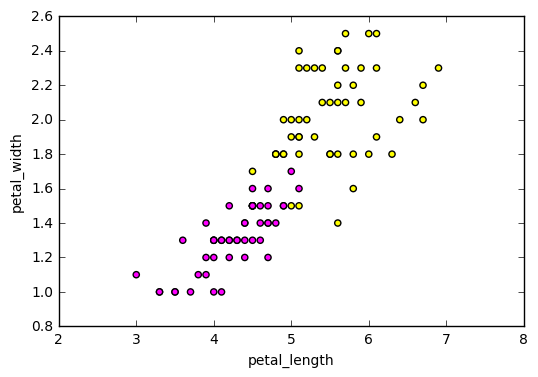

In [5]:
# load iris, extract petal_length and petal_width of versicolors and virginicas

from sklearn import datasets
iris = datasets.load_iris()
print 'Features: ', iris.feature_names
print 'Targets: ', iris.target_names
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

IrisX = np.array(iris.data.T)
IrisX = IrisX[:, iris.target!=0]

IrisX2F = np.vstack([petal_length, petal_width])
IrisX2F = IrisX2F[:, iris.target!=0]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX2F[0,:], IrisX2F[1,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [8]:
#
# Fit a linear SVM using libsvm
#

svm_model = TODO
svm_model.fit(TODO)

print "libsvm error rate: %f" % ((svm_model.predict(IrisX2F.T)!=IrisY).mean(),)

libsvm error rate: 0.050000


In [ ]:
#
# Plot the decision boundary
#

petal_lengths, petal_widths = np.meshgrid(np.linspace(IrisX2F[0,:].min(), IrisX2F[0,:].max(), 100),
                                          np.linspace(IrisX2F[1,:].min(), IrisX2F[1,:].max(), 100))

IrisXGrid = np.vstack([petal_lengths.ravel(), petal_widths.ravel()])
predictions_Grid = svm_model.predict(IrisXGrid.T)

contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(IrisX2F[0,:], IrisX2F[1,:], c=IrisY.ravel(), cmap='spring')

xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by libsvm')

In [ ]:
#
# Plot the decision boundary and the support vectors.
#
# You can extract the indices of support vectors and their weights from fielfs of the 
# svm object. Display the loaction of support vectors and their weights (by changing the 
# size in the scatterplot)


support_vector_indices = TODO
support_vector_coefficients = TODO

contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(TODO,
        cmap='spring')

xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by libsvm')

# Problem 2 [1p]

Reimplement the linear SVM using the use `cvxopt.solvers.qp`
Quadratic Programming (QP) solver. You will need to define the matrices
that define the problem. Compare the obtained solutions. Extract the
support vectors from the LIBSVM solution and plot the support vectors.

The `cvxopt.solvers.qp` solves the following optimization problem: 

\begin{align}
\text{minimize over } x \text{: }& \frac{1}{2} x^T P x + q^T x \\
\text{subject to: } & Gx \leq h \\
& Ax = b
\end{align}

To solve the SVM problem you need to encode the weights $W$, biases $b$, and slack variables $\xi$ as elements of the vector $x$, then properly fill the matrices and vectors $P$, $q$, $G$, $h$. We can ignore setting the $A$ and $b$ parametrs, since there are no linear constraints.

In [ ]:
#
# Now solve the SVM using the QP solver
#

n, m = IrisX2F.shape
C=10.0

P = np.zeros((n+1+m, n+1+m)) #w, bias, xi
q = np.zeros((n+1+m,1)) 
G = np.zeros((2*m, n+1+m)) # we have two ocnstrains fot each data point: 
                           # that the margin is equal to 1-xi
                           # and that xi is nonnegative
h = np.zeros((2*m,1))
#
# TODO: fill in P, q, G, h
#

TODO

#
# Now run the solver
#
ret  = cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q), 
                         cvxopt.matrix(G), cvxopt.matrix(h), )

ret = np.array(ret['x'])

#
# extract the weights and biases
#
W = ret[:n].reshape(-1,1)
b = ret[n]

#
# Extract the weight and bias from libsvm for comparison
#
Wlibsvm = TODO
blibsvm = TODO

print 'W', W.T, 'Wlibsvm', Wlibsvm
print 'b', b, 'blibsvm', blibsvm

In [ ]:
#
# Plot the decision boundary obtained with QP
#

predictions_QP_Grid = (W.T.dot(IrisXGrid) + b)>0.0

print predictions_QP_Grid.shape

contourf(petal_lengths, petal_widths, 
         predictions_QP_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(IrisX2F[0,:], IrisX2F[1,:], c=IrisY.ravel(), cmap='spring')

xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by QP solver')

# Problem 3 [2p]

Repeat 100 bootstrap experiments to establish the effect of constant $C$ on SVM.

For each experiment do the following:

1. Sample (with replacement) a bootstrap dataset equal in size to the
    training dataset. This will be this experiment's training dataset.
2. Prepare the experiment's testing dataset by using samples not
    inluded in the bootstrap dataset.
3. For all $C$ from the set $\{10^{-4}, 10^{-3.5}, 10^{-3.}, \ldots, 10^{6}\}$
    fit a nonlinear SVM (Gaussian kernel, called \texttt{rbf} in
    LIBSVM using the default $\gamma$) and record the training and
    testing errors.

Analyze a box plot of errors as a function of $C$. Can you see its
influence on the training and testing error, as well as on the
testing error variability? Indicate regions of overfitting and underfitting.



In [ ]:
res = []
for rep in xrange(100):
    bootstrap_sel = TODO
    test_sel = TODO

    bootstrap_IrisX = IrisX[:,bootstrap_sel]
    bootstrap_IrisY = IrisY[:,bootstrap_sel]
    
    test_IrisX = IrisX[:,test_sel]
    test_IrisY = IrisY[:,test_sel]
    
    #
    # TODO: Loop over a list of exponents.
    #
    for Cexponent in TODO:
        C = 10.0**Cexponent
        svm_model = TODO
        svm_model.fit(TODO)
        train_acc = TODO
        test_acc = TODO
        
        res.append(dict(Cexponent=Cexponent, test_err=1-test_acc, train_err=1-train_acc))

res = pandas.DataFrame(res)
figure(figsize=(20,10))
res.boxplot(['test_err','train_err'], 'Cexponent', rot=90)

# Problem 4 [3p bonus]

Implement a nonlinear SVM by solving the dual problem using the Quadratic Programming solver. Compare results with LIBSVM.

# Problem 5 [2p bonus]
Compare two ways to implement a multi-class
SVM: by training ``1-vs-1'' classifier for each class combination,
and by training a ``1-vs-rest'' classifier for each clas. See
http://www.csie.ntu.edu.tw/\~cjlin/papers/multisvm.pdf for
details.


# Problem 6 [1p bonus]

Implement the closed form solution for ridge
regularized linear regression.

Then analyze datasets sampled using the following procedure:

1. $x \propto U(0;1)$: $x$ is sampled uniformly from the  $0-1$ range.
2. $y \propto \mathcal{N}(\mu=1+2x-5x^2 + 4x^3, \sigma=0.1)$: then 
    $y$ is sampled from the Normal distribution with mean 
    $\mu=1+2x-5x^2+4x^3$ and standard deviation $0.1$

Repeat 30 times an experiment in which you sample a new training
dataset, then fit polynomials of degree 0 to 14 and use $\lambda$
value from the set $\{0, 10^{-6}, 10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}\}$.

Plot the mean training and testing errors. Indicate regions of high
bias and of high variance. What is the effect of increasing $\lambda$?

In [ ]:
def poly_fun(X, Theta):
    """Compute the value of polynomial with coefficients Theta for points in X"""
    #
    # TODO: Write body of the function.
    # Return a vector of values in points from X (the same shape as X).
    # 

#
# The true polynomial relation:
# y(x) = 1 + 2x -5x^2 + 4x^3
#
# TODO: write down the proper coefficients
#
true_poly = np.array([1., 2., -5, 4])

def make_dataset(N, theta=true_poly, sigma=0.1):
    """ Sample a dataset """
    X = np.random.rand(N)
    Y = np.random.randn(N)*sigma + poly_fun(X, true_poly)
    return X,Y


train_data = make_dataset(30)
XX = np.linspace(0,1,100)
YY = poly_fun(XX, true_poly)
scatter(train_data[0], train_data[1], label='train data', color='r')
plot(XX, poly_fun(XX, true_poly), label='ground truth')
legend(loc='upper left')

In [21]:
#please note: lambda is a reserved keyword in python, thus we use _lambda
def poly_fit(data, degree, _lambda):
    "Fit a polynomial of a given degree and weight decay parameter C"
    powers = np.arange(degree + 1.0).reshape(-1,1)
    X = data[0].reshape(1,-1)
    Y = data[1].reshape(1,-1)
    XX = X**powers
    #
    # TODO: implement the closed-form solution for Theta
    #
    # Please note that np.inv may be numerically unstable.
    # It is better to use np.linalg.solve or even a QR decomposition.
    #
    Theta = TODO
    return Theta

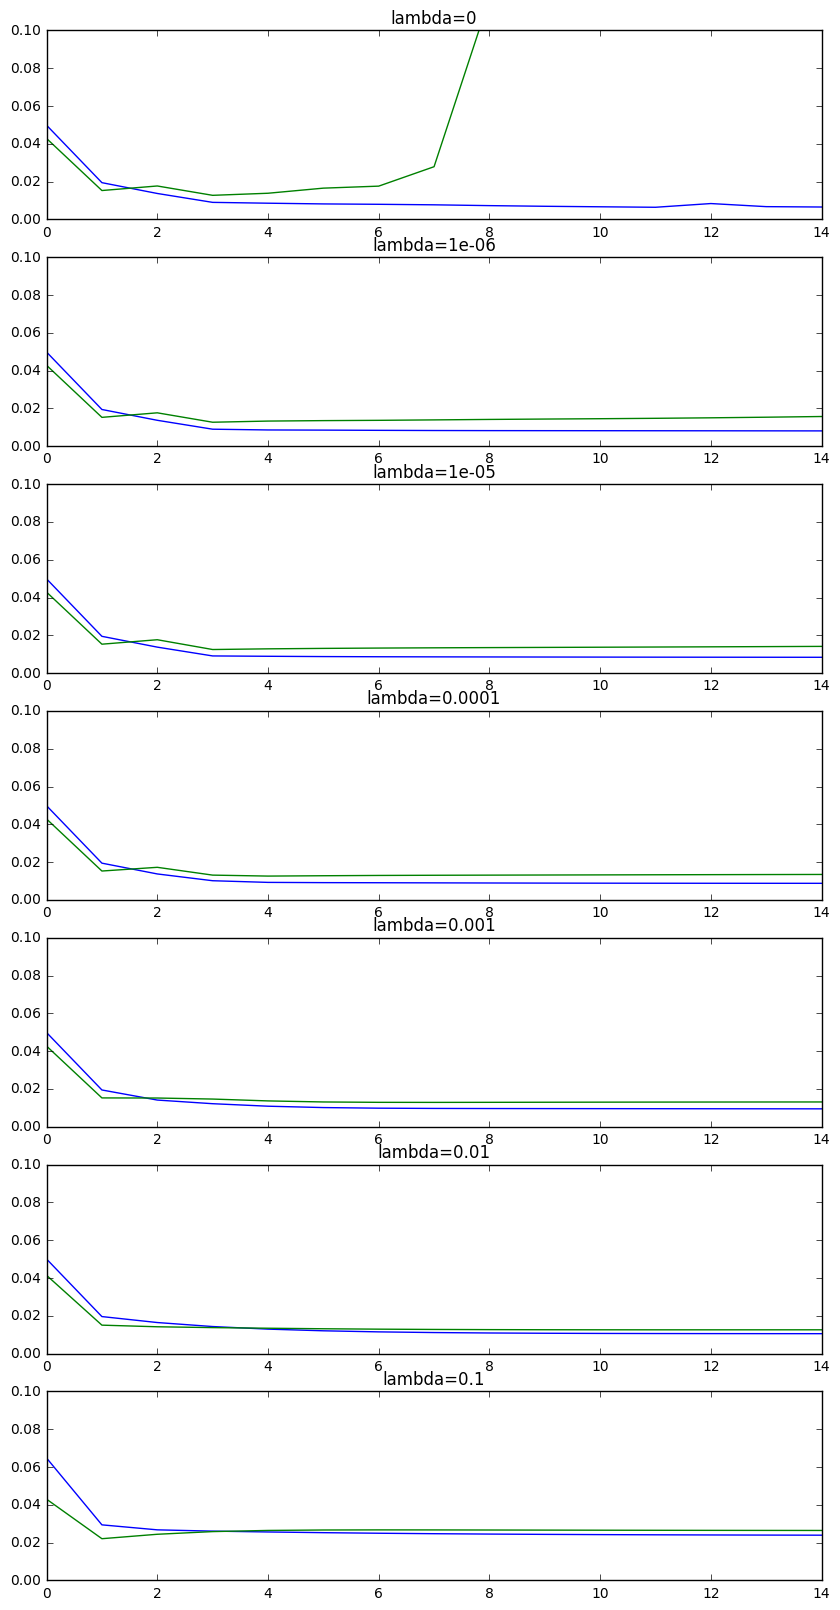

In [22]:
lambdas = [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
degrees  = arange(15)

num_repetitions = 30
num_samples = 30

train_errors = np.zeros((len(lambdas), len(degrees)))
test_errors = np.zeros((len(lambdas), len(degrees)))

#sample a single dataset for all experiments
test_data = make_dataset(num_samples)

for repetition in xrange(num_repetitions):
    #sample a new training dataset for this repetition
    train_data = make_dataset(num_samples)
    #scatter(data[0], data[1])
    for degree_i, degree in enumerate(degrees):
        for lambda_i, _lambda in enumerate(lambdas):
            Theta = poly_fit(train_data, degree, _lambda)
            #
            # TODO: compute the mean training and test errors
            #
            train_errors[lambda_i, degree_i] += TODO
            test_errors[lambda_i, degree_i] += TODO
train_errors /=  num_repetitions
test_errors /= num_repetitions

figure(figsize=(10,20))
for lambda_i, _lambda in enumerate(lambdas):
    subplot(len(lambdas), 1, lambda_i+1)
    plot(degrees, train_errors[lambda_i,:], label='train')
    plot(degrees, test_errors[lambda_i,:],  label='test')
    ylim(0,0.1)
    title('lambda=%g'%(_lambda,))

# Problem 7 [2p]

Fill in the blanks in the K-means code. Then compare the following 3 strategies for initial point selection

1. Uniform sampling over the range of the data
2. Uniform sampling of data points
3. Kmeans++ (http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf, pg. 3):
    1. the first point is sampled uniformly from the dataset
    2. subsequent points are sampled with probability $\frac{D(x)^2}{\sum_{x'} D(x')^2}$, where $D(x)$ denotes the distance from $x$ to a nearest point that was already chosen. 
    
Conduct experiments for various number of clusters and different initialization strategies. Make screenshots of some representative solutions (and failure modes).

Make one cluster of the generated data much 3-5 times larger. How does it affect the K-means solution?

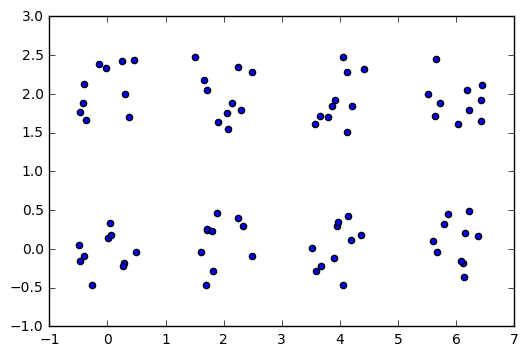

In [52]:
def gen_cluster(x0, y0, n=20):
    return np.random.rand(2,n) + np.array([[x0],[y0]]) - 0.5

def gen_data():
    clusters = []

    for x in [0,2,4,6]:
        for y in [0,2]:
            n = 10
            clusters.append(gen_cluster(x,y,n))

    return np.hstack(clusters)

data = gen_data()
scatter(data[0,:], data[1,:])

In [25]:
def dist(X,Y):
    dd = X[:,None,:] - Y[:,:,None]
    dd = (dd**2).sum(0)
    return dd

In [53]:
def k_means(data, k, init_pts='rand_samples'):
    dim, ns = data.shape
    
    if init_pts == 'rand_samples':
        C = TODO
    elif init_pts == 'rand_range':
        C = TODO
    elif init_pts == 'km++':
        C = TODO
    else:
        raise Exception('invalid init_pts!')
    
    Cinit = C.copy()
    last_assignments = np.zeros((ns,))
    while True:
        D = dist(data, C)
        assignment = TODO

        for ci in xrange(k):
            sel = assignment==ci
            if sum(sel) == 0:
                print 'empty cluster: ', ci, '!'
                C[:,ci] = np.inf
            else:
                C[:,ci] = TODO
        if np.all(assignment == last_assignments):
            break
        last_assignments = assignment
    
    return assignment, C, Cinit

In [ ]:
colormap = [
    (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
    (1.0, 1.0, 0.7019607843137254),
    (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
    (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
    (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
    (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
    (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
    (0.9882352941176471, 0.803921568627451, 0.8980392156862745)]


a, c, cinit = k_means(data, 8, init_pts='km++')

for ci in set(a):
    scatter(data[0,a==ci],data[1,a==ci], color=colormap[ci], s=25)

scatter(cinit[0,:], cinit[1,:], color='k',marker='*', s=40)
scatter(c[0,:], c[1,:], color='k',marker='v', s=25)

# Problem 8 [2p bonus]

Implement the "Bisecting k-means" algorithm, such as the one from Apache Spark: https://spark.apache.org/docs/1.6.0/api/java/org/apache/spark/mllib/clustering/BisectingKMeans.html.